In [25]:
import pandas as pd

In [26]:
dados = pd.read_csv('arquivo_viva_real_limpo.csv')

In [27]:
dados.head()

,preco,area_m2,quartos,banheiros,vagas,localizacao,imovel
0,155000.0,50,2.0,1.0,1.0,"Campos Ville, Araraquara",Apartamento
1,88404.0,45,2.0,1.0,1.0,"Parque Laranjeiras, Araraquara",Apartamento
2,81964.0,46,2.0,1.0,1.0,"Vila Cidade Industrial (Vila Xavier), Araraquara",Apartamento
3,89575.0,44,2.0,1.0,1.0,"Jardim América (Vila Xavier), Araraquara",Apartamento
4,125000.0,44,2.0,1.0,1.0,"Vila Xavier (Vila Xavier), Araraquara",Apartamento


In [28]:
dados['imovel'].unique()


array(['Apartamento', 'Casa', 'comercial', 'Flat', 'Sobrado', 'Conjunto',
       'condomínio', 'Cobertura', 'Chácara', 'inteiro', 'Imóvel'],
      dtype=object)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
fig = px.scatter(dados, x='area_m2', y='preco', trendline_color_override='red', trendline='ols')
fig.update_layout(
	title='Relação entre área e preço dos imóveis',
	xaxis_title='Área (m²)',
	yaxis_title='Preço (R$)'
)
fig.show()

In [31]:
dados_apartamentos = dados.query('imovel == "Apartamento"')
dados_casas = dados.query('imovel == "Casa"')
dados_comerciais = dados.query('imovel == "comercial"')

In [32]:
px.scatter(dados_apartamentos, x='area_m2', y='preco', title='Regressão: Apartamento', trendline='ols').show()
px.scatter(dados_casas, x='area_m2', y='preco', title='Regressão: Casa', trendline='ols').show()
px.scatter(dados_comerciais, x='area_m2', y='preco', title='Regressão: Comercial', trendline='ols').show()


In [33]:
df_combinado = pd.concat([dados_apartamentos, dados_casas, dados_comerciais], ignore_index=True)
px.scatter(df_combinado, x='area_m2', y='preco', color='imovel', title='Regressão por Tipo de Imóvel').show()

c:\Users\MATEUS\Desktop\observatóroi_araraquara\observatorio_araraquara\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
y = dados_casas['preco']
X = dados_casas.drop(['preco'], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
dados_train = pd.DataFrame(X_train)
dados_train['preco'] = y_train


In [38]:
from statsmodels.formula.api import ols

In [39]:
modelo_0 = ols('preco ~ area_m2', data=dados_train).fit()

In [40]:
modelo_0.params

Intercept    201223.275911
area_m2        1388.106491
dtype: float64

In [41]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     114.4
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           1.31e-19
Time:                        19:19:06   Log-Likelihood:                -1729.6
No. Observations:                 134   AIC:                             3463.
Df Residuals:                     132   BIC:                             3469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.012e+05   2.33e+04      8.624      0.0

In [42]:
modelo_0.rsquared

np.float64(0.46420072481009156)

O metro quadrado da casa explica 46% do seu valor

In [43]:
modelo_0.resid

66     -19722.504180
218    -33008.893664
895      3110.041422
996    -24226.410834
984    -90005.758741
           ...      
650    -99977.592431
71      -6181.026446
569    194809.568784
959    -22767.888568
626     33067.791957
Length: 134, dtype: float64

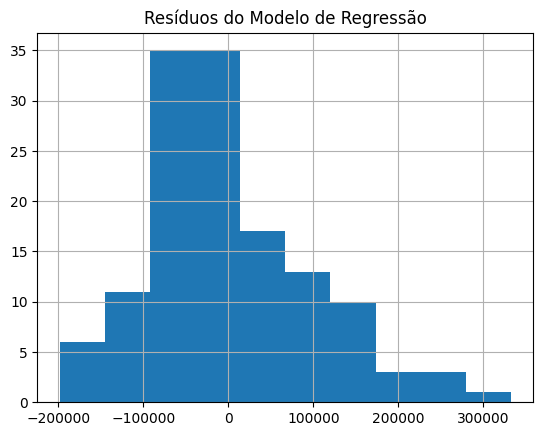

In [44]:
modelo_0.resid.hist()
plt.title('Resíduos do Modelo de Regressão')
plt.show()

In [45]:
y_predict = modelo_0.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
print('R²:', r2_score(y_test, y_predict))

R²: 0.29411984662809343


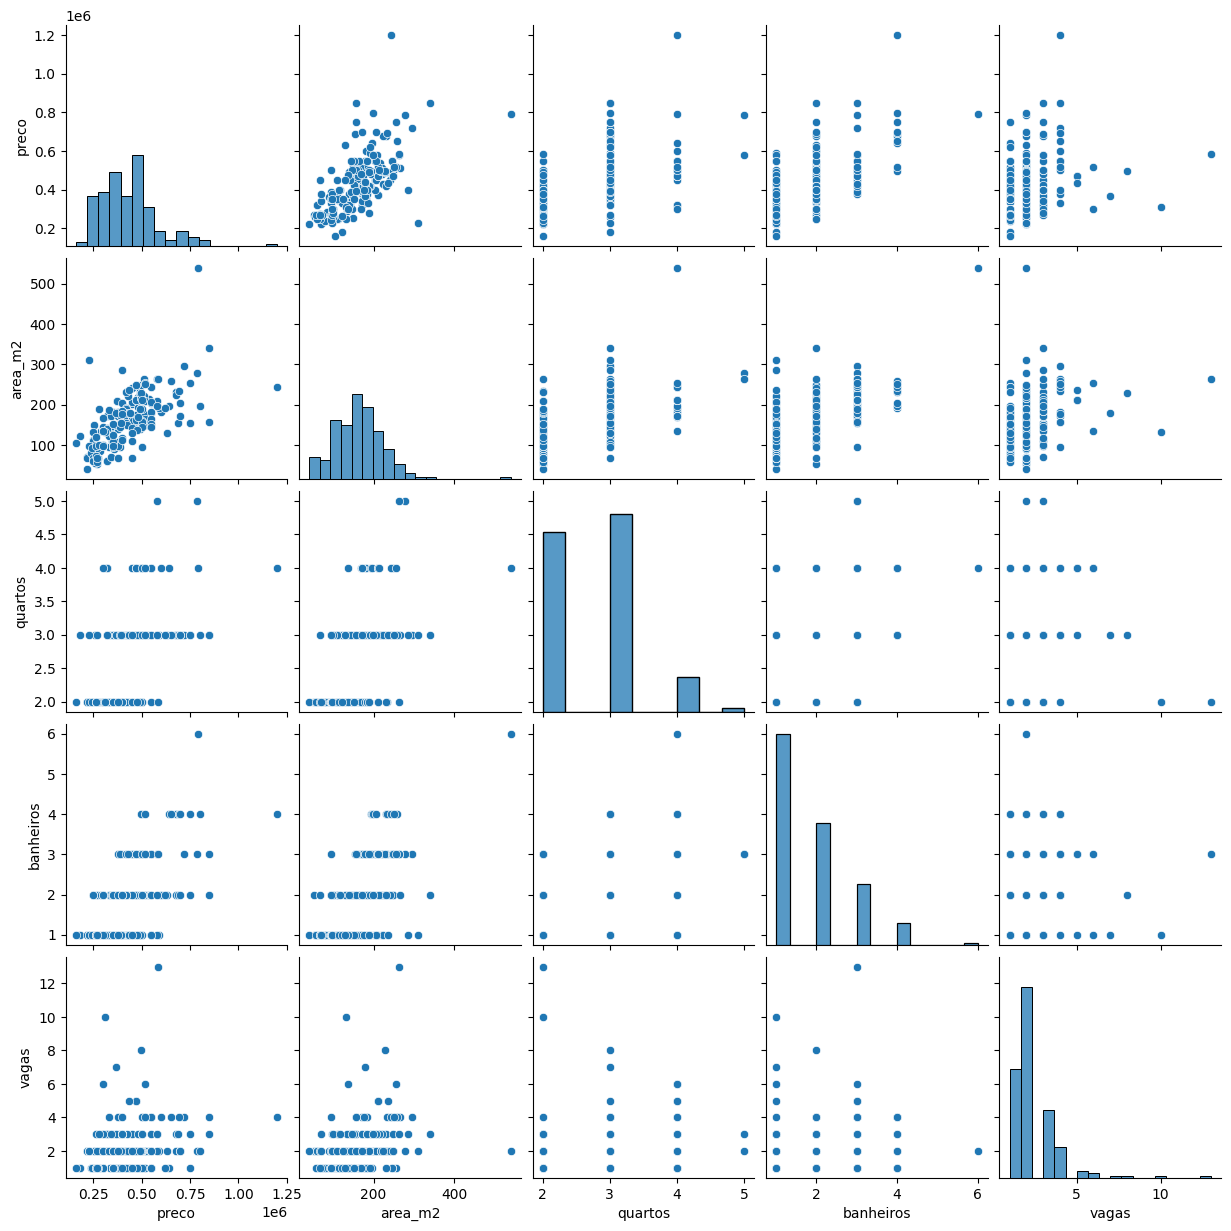

In [48]:
sns.pairplot(dados_casas)
plt.show()

In [49]:
dados_casas.columns

Index(['preco', 'area_m2', 'quartos', 'banheiros', 'vagas', 'localizacao',
       'imovel'],
      dtype='object')

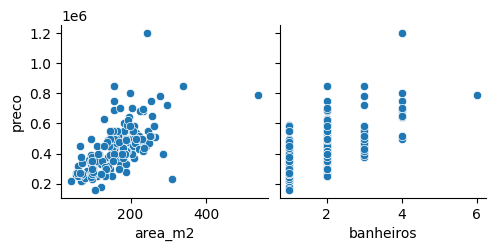

In [50]:
sns.pairplot(dados_casas, y_vars='preco', x_vars=['area_m2', 'banheiros'])


In [51]:
import statsmodels.api as sm

In [52]:
X_train = sm.add_constant(X_train)

In [53]:
X_train.head()

,const,area_m2,quartos,banheiros,vagas,localizacao,imovel
66,1.0,143,2.0,1.0,2.0,"Jardim Pinheiros (Vila Xavier), Araraquara",Casa
218,1.0,203,3.0,3.0,3.0,"Jardim das Estações (Vila Xavier), Araraquara",Casa
895,1.0,213,4.0,2.0,3.0,"Vila Tito de Carvalho (Vila Xavier), Araraquara",Casa
996,1.0,67,3.0,1.0,1.0,"Jardim Adalberto Frederico de Oliveira Roxo I,...",Casa
984,1.0,136,4.0,1.0,6.0,"Parque Residencial Vale do Sol, Araraquara",Casa


In [54]:
modelo1 = sm.OLS(y_train, X_train[['const', 'area_m2', 'banheiros', 'vagas', 'quartos']]).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     39.46
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           1.51e-21
Time:                        19:19:09   Log-Likelihood:                -1717.9
No. Observations:                 134   AIC:                             3446.
Df Residuals:                     129   BIC:                             3460.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.099e+05   3.36e+04      3.271      0.0

In [55]:
def regressao_linear(dados, variaveis_independentes, variavel_dependente):
    X = dados[variaveis_independentes]
    y = dados[variavel_dependente]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    modelo = sm.OLS(y_train, X_train).fit()
    
    print(modelo.summary())
    
    y_predict = modelo.predict(X_test)
    
    print('R²:', r2_score(y_test, y_predict))

In [56]:
regressao_linear(dados_casas, ['area_m2', 'banheiros', 'vagas', 'quartos'], 'preco')

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     39.46
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           1.51e-21
Time:                        19:35:40   Log-Likelihood:                -1717.9
No. Observations:                 134   AIC:                             3446.
Df Residuals:                     129   BIC:                             3460.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.099e+05   3.36e+04      3.271      0.0

In [57]:
regressao_linear(dados_apartamentos, ['area_m2', 'banheiros', 'vagas', 'quartos'], 'preco')

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     187.0
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           2.43e-94
Time:                        19:35:52   Log-Likelihood:                -5751.9
No. Observations:                 456   AIC:                         1.151e+04
Df Residuals:                     451   BIC:                         1.153e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.316e+05   2.89e+04     -4.554      0.0

In [58]:
regressao_linear(dados_comerciais, ['area_m2', 'banheiros', 'vagas', 'quartos'], 'preco')

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     15.14
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           2.08e-09
Time:                        19:36:09   Log-Likelihood:                -1185.9
No. Observations:                  91   AIC:                             2382.
Df Residuals:                      86   BIC:                             2394.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.01e+05   4.46e+04      2.262      0.0